In [26]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt

# import project_path
from nudel import Nuclide

from uncertainties import ufloat

# Level scheme plots

In [2]:
def level_scheme(nuc=None, nucleons=None, protons=None, n_max = 40):
    decays = []
    if not nuc:
        nuc = Nuclide(nucleons, protons)
    for level in nuc.adopted_levels.levels[:n_max]:
        decays.extend(level.decays)
    
    i = 0.5
    for level in nuc.adopted_levels.levels[:n_max]:
        plt.axhline(level.energy.val, color='k')
        for decay in level.decays:
            plt.plot(
                [i, i],
                [decay.orig_level.energy.val, decay.dest_level.energy.val],
            )
            i += 1
    plt.xlim(0, i - 0.5)
    plt.ylim(0, nuc.adopted_levels.levels[n_max].energy.val)
    plt.show()

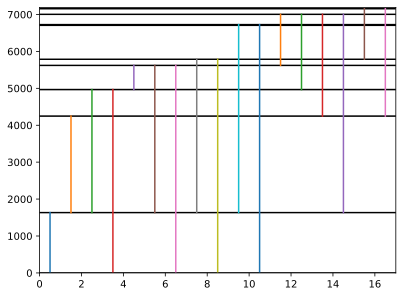

In [3]:
level_scheme(nucleons=20, protons=10, n_max=10)

# Decay extraction

In [6]:
ne20 = Nuclide(20,10)
x = ne20.adopted_levels.levels[4]

In [33]:
def collect_transitions(transition_type,nuc=None, nucleons=None, protons=None, n_max = 40):
    decays = []
    if not nuc:
        nuc = Nuclide(nucleons, protons)
    for level in nuc.adopted_levels.levels[:n_max]:
        decays.extend(level.decays)
    
    trans_list = []
    for decay in decays:
        print(decay.attr)
        if transition_type in decay.attr.keys():
            trans_list.append(decay)
#             print('Added to the list!')
            
    return trans_list

In [53]:
class Gamma():
    def __init__(self):
        self.type = None
        self.A = None
        self.Z = None
        self.N = None
        self.Jpi = None
        self.Jpf = None
        self.Ei = None
        self.Ef = None
        self.dEi = None
        self.dEf = None
        self.ni = None
        self.nf = None
        self.ref = None
        self.BW = None
        self.dBW = None
        self.Thalf = None
    

In [55]:
x = Gamma()
x.Jpi = '2+'

In [34]:
trans_list = collect_transitions('BM1W',nuc=ne20)

{'BE2W': <20.3(10)>}
{'BE2W': <22(2)>}
{'BE1W': <7.3(8)e-6>, 'BM2W': <0.017(4)>, 'BE3W': <6(2)>}
{'BM2W': <0.0025(8)>}
{'BM1W': <2.0(9)e-3>}
{'BE1W': <6.6(19)e-6>}
{'BE3W': <11(4)>}
{'BE1W': <1.1(2)e-4>}
{'BE1W': <8.3(3)e-6>}
{'BE2W': <3.6>}
{}
{'BM1W': <6.9e-3>}
{'BE2W': <1.8>}
{'BE1W': <9.1e-5>}
{'BM2W': <1.5(8)e-2>}
{'BE2W': <50(8)>}
{'BE1W': <7.9(9)e-5>}
{'BE2W': <0.31(6)>}
{}
{}
{'BM1W': <1.0(3)e-4>, 'BE2W': <1.7(2)>}
{}
{}
{'BM1W': <2.3(3)e-3>}
{'BE2W': <0.73(9)>}
{'BE2W': <27(6)>}
{'BE1W': <5(3)e-5>}
{'BE1W': <1.9(5)e-4>}
{'BE2W': <20(3)>}
{}
{'BE2W': <5.8(7)>}
{'BM1W': <4.9(12)e-3>}
{'BM1W': <5.8(11)e-3>}
{'BE1W': <6.2(10)e-5>}
{}
{'BM1W': <2.5(10)e-2>}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'BE2W': <8.3(37)>}
{}
{'BM1W': <2.6(7)e-2>}
{'BM1W': <0.64(8)>}
{'BE1W': <1.9(3)e-3>}
{'BE1W': <8.0(11)e-4>}
{'BM1W': <0.30(3)>}
{'BE2W': <9.5(26)e-2>}
{'BM1W': <6.1(28)e-3>}
{'BE2W': <17(6)>}
{}
{}
{}
{}


In [35]:
az_list = [(20,10),(21,10),(22,10)]
trans = {}
for az in az_list:
    trans[az] = collect_transitions('BM1W',nucleons=az[0],protons=az[1])

{'BE2W': <20.3(10)>}
{'BE2W': <22(2)>}
{'BE1W': <7.3(8)e-6>, 'BM2W': <0.017(4)>, 'BE3W': <6(2)>}
{'BM2W': <0.0025(8)>}
{'BM1W': <2.0(9)e-3>}
{'BE1W': <6.6(19)e-6>}
{'BE3W': <11(4)>}
{'BE1W': <1.1(2)e-4>}
{'BE1W': <8.3(3)e-6>}
{'BE2W': <3.6>}
{}
{'BM1W': <6.9e-3>}
{'BE2W': <1.8>}
{'BE1W': <9.1e-5>}
{'BM2W': <1.5(8)e-2>}
{'BE2W': <50(8)>}
{'BE1W': <7.9(9)e-5>}
{'BE2W': <0.31(6)>}
{}
{}
{'BM1W': <1.0(3)e-4>, 'BE2W': <1.7(2)>}
{}
{}
{'BM1W': <2.3(3)e-3>}
{'BE2W': <0.73(9)>}
{'BE2W': <27(6)>}
{'BE1W': <5(3)e-5>}
{'BE1W': <1.9(5)e-4>}
{'BE2W': <20(3)>}
{}
{'BE2W': <5.8(7)>}
{'BM1W': <4.9(12)e-3>}
{'BM1W': <5.8(11)e-3>}
{'BE1W': <6.2(10)e-5>}
{}
{'BM1W': <2.5(10)e-2>}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{'BE2W': <8.3(37)>}
{}
{'BM1W': <2.6(7)e-2>}
{'BM1W': <0.64(8)>}
{'BE1W': <1.9(3)e-3>}
{'BE1W': <8.0(11)e-4>}
{'BM1W': <0.30(3)>}
{'BE2W': <9.5(26)e-2>}
{'BM1W': <6.1(28)e-3>}
{'BE2W': <17(6)>}
{}
{}
{}
{}
{'BM1W': <0.0712(14)>, 'BE2W': <24.3(20)>}
{'BM1W': <0.146(12)>, 'BE2W': <11(4)>}
{'BE2W': <(9.3(

In [47]:
nl = "\n"
for az in trans.keys():
    for t in trans[az]:
        print(az)
        i = t.orig_level; f = t.dest_level
        print(t.attr,nl,i.prop,nl,"-->",nl,f.prop,nl,'-'*20)

(20, 10)
{'BM1W': <2.0(9)e-3>} 
 {'E': '5621.4 17', 'DE': '17', 'J': '3-', 'T': '139 FS 35', 'DT': '35', 'L': '', 'S': '', 'DS': '', 'C': '', 'MS': '', 'Q': '', '%IT': '7 3', '%A': '93 3', 'WIDTHG': '2.4E-4 EV 6', 'ISPIN': '0', 'XREF': 'ACDF'} 
 --> 
 {'E': '4966.51 20', 'DE': '20', 'J': '2-', 'T': '3.3 PS 4', 'DT': '4', 'L': '', 'S': '', 'DS': '', 'C': '', 'MS': '', 'Q': '', 'ISPIN': '0', 'XREF': 'ABCGFI'} 
 --------------------
(20, 10)
{'BM1W': <6.9e-3>} 
 {'E': '7004.0 36', 'DE': '36', 'J': '4-', 'T': '305 FS 62', 'DT': '62', 'L': '', 'S': '', 'DS': '', 'C': '', 'MS': '', 'Q': '', 'ISPIN': '0', 'XREF': 'ACF'} 
 --> 
 {'E': '5621.4 17', 'DE': '17', 'J': '3-', 'T': '139 FS 35', 'DT': '35', 'L': '', 'S': '', 'DS': '', 'C': '', 'MS': '', 'Q': '', '%IT': '7 3', '%A': '93 3', 'WIDTHG': '2.4E-4 EV 6', 'ISPIN': '0', 'XREF': 'ACDF'} 
 --------------------
(20, 10)
{'BM1W': <1.0(3)e-4>, 'BE2W': <1.7(2)>} 
 {'E': '7421.9 12', 'DE': '12', 'J': '2+', 'T': '15.1 KEV 7', 'DT': '7', 'L': '', 'S': 